# -> Importação de dados gerais

In [39]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados_entrada_diario.xlsx")
df.head()

,producao,dia,mes,ano,semana,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,170952.0,2018-01-01,1,2018,1,NaN,NaN,NaN,NaN
1,138767.0,2018-01-02,1,2018,1,NaN,NaN,NaN,NaN
2,130747.0,2018-01-03,1,2018,1,NaN,NaN,NaN,NaN
3,123893.0,2018-01-04,1,2018,1,NaN,NaN,NaN,NaN
4,124229.0,2018-01-05,1,2018,1,NaN,NaN,NaN,NaN


Index(['producao', 'dia', 'mes', 'ano', 'semana', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
Index(['producao'], dtype='object')


<AxesSubplot: >

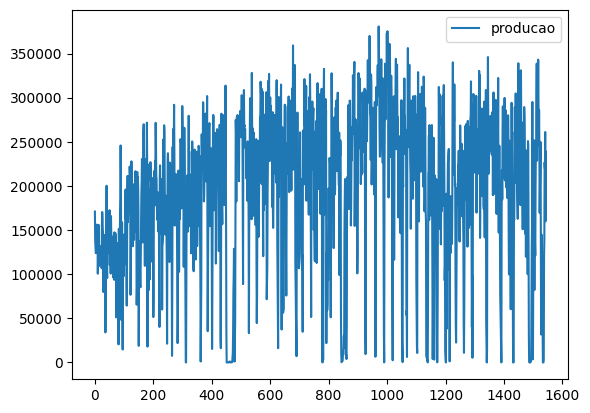

In [40]:
#drop de colunas sem utilidade
print(df.columns)
df['producao'] = pd.to_numeric(df['producao'])
#os dados nulos não podem ser desconsiderados -> apenas execução de testes
df.drop(df[df['producao'] == 0].index, inplace=True)
df.drop('Unnamed: 5', axis=1, inplace=True) 
df.drop('Unnamed: 6', axis=1, inplace=True) 
df.drop('Unnamed: 7', axis=1, inplace=True) 
df.drop('Unnamed: 8', axis=1, inplace=True) 
df.drop('semana', axis=1, inplace=True) 
df.drop('ano', axis=1, inplace=True) 
df.drop('mes', axis=1, inplace=True)
# df['dia'] = pd.to_datetime(df['dia'])
df.drop('dia', axis=1, inplace=True)
#os dados nulos não podem ser desconsiderados
df.dropna(inplace=True)
print(df.columns)

df.plot()

# -> Definição de bases de treino e teste

<AxesSubplot: >

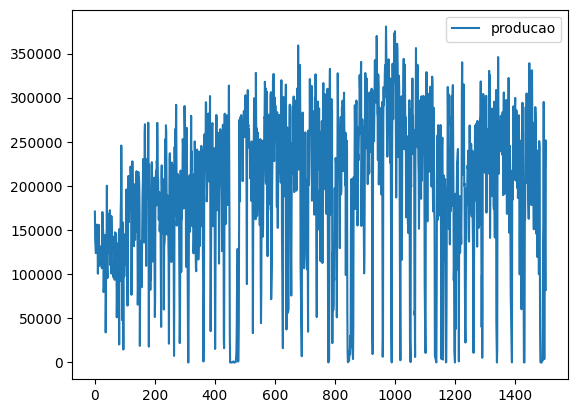

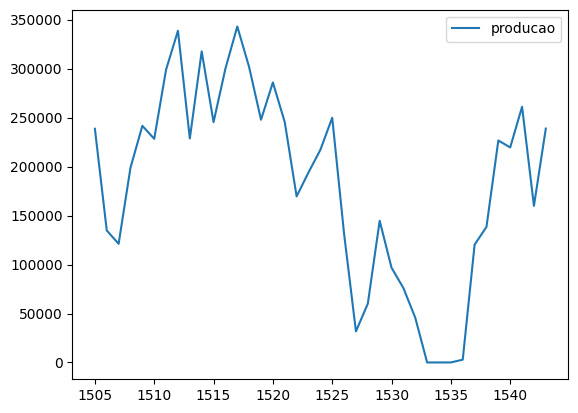

In [42]:
msk = (df.index < len(df)-10)
df_train = df[msk].copy()
df_test = df[~msk].copy()
df_train.plot()
df_test.plot()

c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


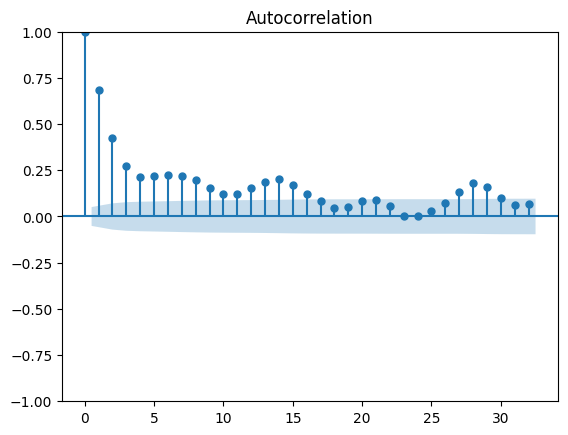

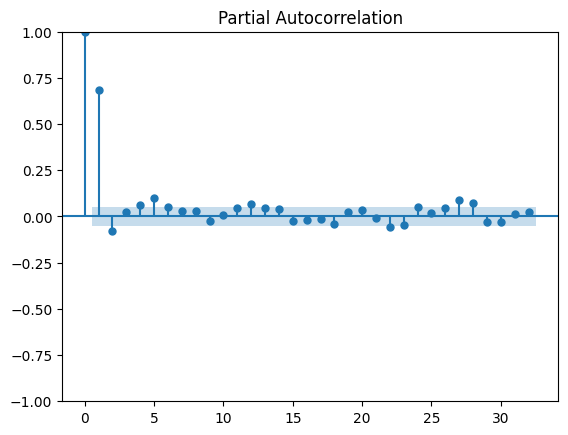

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [46]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
#print(adf_test)

<AxesSubplot: >

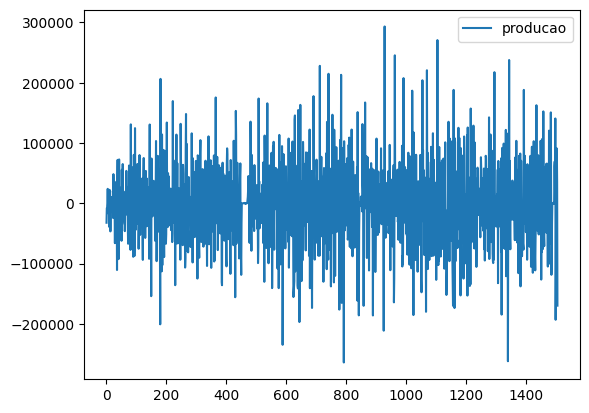

In [48]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


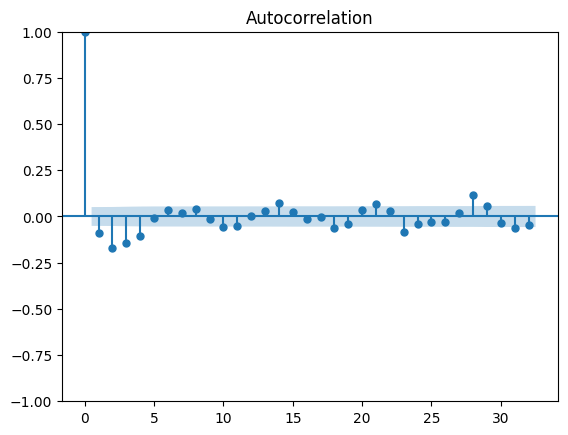

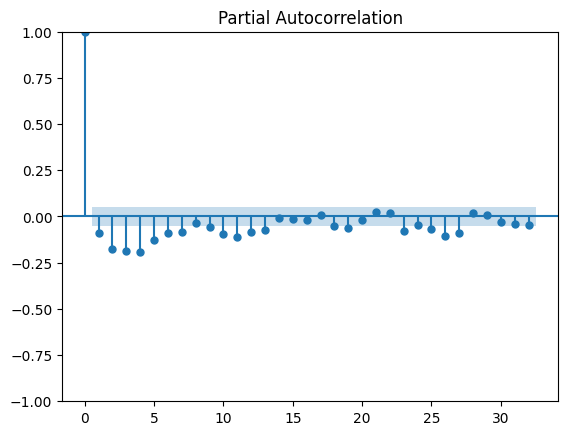

In [49]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [50]:
adf_test = adfuller(df_train_diff)
print(f'p-value = {adf_test[1]}')

p-value = 2.8556759040071565e-21


In [51]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

NameError: name 'dados_previsao' is not defined